<a href="https://colab.research.google.com/github/Witterone/Benjamin_Witter.github.io/blob/master/Car_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
car = pd.read_csv('https://raw.githubusercontent.com/Witterone/Dept.-Transportation-light-vehicles/master/light-duty-vehicles-2020-05-20.csv')
car.head()

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Transmission Type,Engine Type,Engine Size,Engine Cylinder Count,Engine Description,Manufacturer,Manufacturer URL,Category,Fuel Code,Fuel,Fuel Configuration Name,Electric-Only Range,PHEV Type,Notes
0,12280,45,9.0,365,29,MDX AWD,2020,NaN,NaN,NaN,26.0,27.0,27.0,Auto,SI,3.0L,6.0,3.0L V6,Acura,http://www.acura.com/,SUV,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN
1,12377,45,9.0,365,27,NSX,2020,NaN,NaN,NaN,21.0,22.0,21.0,Auto,SI,3.5L,6.0,3.5L V6,Acura,http://www.acura.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN
2,12306,45,9.0,365,27,RLX,2020,NaN,NaN,NaN,28.0,29.0,28.0,Auto,SI,3.5L,6.0,3.5L V6,Acura,http://www.acura.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN
3,12379,45,9.0,377,27,A6 Allroad,2020,NaN,NaN,NaN,20.0,26.0,22.0,Auto,SI,3.0L,6.0,3.0L V6,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN
4,12307,45,9.0,377,27,A6 quattro,2020,NaN,NaN,NaN,24.0,32.0,27.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN


In [2]:
brands = car[['Manufacturer ID','Manufacturer']]
brand_ID =[brands['Manufacturer'].unique(),brands['Manufacturer ID'].unique()]
#brand_ID = pd.DataFrame(brand_ID.T,columns=['Brand','ID'])
brand_ID = np.array(brand_ID)
brand_ID = brand_ID.T
brand_ID = pd.DataFrame(brand_ID,columns=['Maker','ID'])
brand_ID[brand_ID['ID']==319]


,Maker,ID
47,Solectria,319


## This is were I made a Dataframe to identify the Manufacturer based on the ID number allowing me to drop the string column

In [3]:
car['Manufacturer ID'].value_counts()

219    439
215    339
213    225
221    152
225    130
209     87
239     87
217     70
243     69
237     65
223     61
211     60
377     54
349     47
351     42
391     40
361     37
275     29
231     29
385     27
227     24
233     23
235     23
359     22
387     19
355     17
347     16
365     16
395     15
229     13
319     12
381     10
263     10
317      9
379      7
383      5
273      5
425      4
315      4
341      4
410      4
247      3
389      3
424      3
353      2
363      2
241      1
271      1
409      1
367      1
371      1
Name: Manufacturer ID, dtype: int64

In [4]:
car['Engine Type'].value_counts()
#This is a column to drop

SI                  864
e-motor             129
CI                  109
Vortec 5300          61
Triton modular       39
                   ... 
80 kW e-motor         1
VTEC E Lean Burn      1
DOHC 24 Valve         1
Vortec  6000          1
Duratech              1
Name: Engine Type, Length: 115, dtype: int64

## I did a quick exploration of Engines listed and found too many unique entries I then decided that I would drop this column.

In [5]:
print(car['Fuel'].value_counts())
car['Fuel ID'].value_counts()

Ethanol (E85)                   888
Hybrid Electric                 527
Electric                        244
CNG - Compressed Natural Gas    224
Plug-in Hybrid Electric         181
Biodiesel (B20)                 148
Propane                          69
CNG - Bi-fuel                    29
Hydrogen Fuel Cell               26
Propane - Bi-fuel                18
Methanol                         14
Other                             1
Name: Fuel, dtype: int64


11    888
45    527
41    244
3     224
57    181
35    148
55     69
37     29
9      26
39     18
49     14
53      1
Name: Fuel ID, dtype: int64

In [6]:
fuel = car[['Fuel','Fuel ID']]
fuel_ID = [fuel['Fuel'].unique(),fuel['Fuel ID'].unique()]
fuel_ID = np.array(fuel_ID)
fuel_ID = fuel_ID.T
fuel_ID = pd.DataFrame(fuel_ID,columns=['fuel','F_ID'])
fuel_ID

,fuel,F_ID
0,Hybrid Electric,45
1,Plug-in Hybrid Electric,57
2,Electric,41
3,Biodiesel (B20),35
4,Ethanol (E85),11
5,Hydrogen Fuel Cell,9
6,CNG - Compressed Natural Gas,3
7,Propane,55
8,CNG - Bi-fuel,37
9,Propane - Bi-fuel,39


## here I made a Dataframe to identify the fuel types by ID number.

In [7]:
cat = car[['Category ID','Category']]
cat_ID = [cat['Category ID'].unique(),cat['Category'].unique()]
cat_ID = np.array(cat_ID).T
cat_ID = pd.DataFrame(cat_ID,columns=['C_ID','Category'])
cat_ID.head()

,C_ID,Category
0,29,SUV
1,27,Sedan/Wagon
2,25,Pickup
3,9,Van
4,17,Vocational/Cab Chassis


## I made a small Dataframe to identify the vehicle type by ID number.

In [8]:
car_C = car.copy()
car_C = car_C[['Vehicle ID','Fuel ID','Fuel Configuration ID',	'Manufacturer ID',	'Category ID','Model Year',
'Alternative Fuel Economy City',	'Alternative Fuel Economy Highway',	'Alternative Fuel Economy Combined',	'Conventional Fuel Economy City',
'Conventional Fuel Economy Highway',	'Conventional Fuel Economy Combined','Engine Size',	'Engine Cylinder Count',	'Engine Description'	]]
car_C.tail()

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Engine Size,Engine Cylinder Count,Engine Description
2364,656,3,1.0,225,9,1992,NaN,NaN,NaN,NaN,NaN,NaN,3.3 L,NaN,NaN
2365,660,49,5.0,225,27,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2366,658,49,5.0,219,9,1992,NaN,NaN,NaN,12.0,17.0,NaN,NaN,NaN,NaN
2367,650,49,5.0,215,27,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2368,649,49,5.0,219,27,1991,14.0,19.0,NaN,19.0,26.0,NaN,3.0 L,6.0,NaN


## This is where I reduced the columns to only the ones that gave numeric information as well as gave a value for most of the rows. 

##This allowed me to view the new dataframe and make sense of the information I was seeing much more quickly.

In [9]:
Cur_car = car_C[car_C['Model Year']>=2000]
Ant_car = car_C[car_C['Model Year']<=1999].reset_index()
Ant_car.head()

,index,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Engine Size,Engine Cylinder Count,Engine Description
0,2240,45,3,3.0,215,27,1999,20.0,26.0,NaN,22.0,26.0,NaN,2.2 L,4.0,NaN
1,2241,46,3,3.0,215,25,1999,12.3,22.1,NaN,12.3,22.1,NaN,5.7 L,8.0,NaN
2,2242,44,41,1.0,215,25,1999,45.0,41.0,NaN,16.0,21.0,NaN,NaN,NaN,NaN
3,2243,53,41,1.0,215,25,1999,94.0,86.0,NaN,16.0,21.0,NaN,NaN,NaN,NaN
4,2244,23,41,1.0,223,9,1999,67.0,73.0,NaN,20.0,26.0,NaN,NaN,NaN,NaN


## Here I decided to split the dataframe into models that were produced before the year 2000 and after.

## I felt that the past 20 years would have a majority of the data and make for much cleaner visualizations.

## I also checked to make sure I was keeping a bulk of the data.

In [10]:
Cur_car['Fuel ID'].value_counts()

11    875
45    527
41    216
57    181
3     161
35    148
55     58
37     29
9      26
39     18
53      1
Name: Fuel ID, dtype: int64

In [11]:
Ant_car['Fuel ID'].value_counts()

3     63
41    28
49    14
11    13
55    11
Name: Fuel ID, dtype: int64

In [12]:
Cur_car[['Alternative Fuel Economy City','Alternative Fuel Economy Highway','Alternative Fuel Economy Combined']].dropna().head()

,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined
10,78.0,78.0,78.0
11,76.0,78.0,77.0
22,124.0,102.0,113.0
23,124.0,102.0,113.0
29,73.0,71.0,72.0


In [13]:
Ant_car['Alternative Fuel Economy Combined']= Ant_car[['Alternative Fuel Economy City','Alternative Fuel Economy Highway']].mean(axis=1)
Ant_car['Alternative Fuel Economy Combined'].isnull().value_counts()

False    105
True      24
Name: Alternative Fuel Economy Combined, dtype: int64

In [14]:
Ant_car.head()

,index,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Engine Size,Engine Cylinder Count,Engine Description
0,2240,45,3,3.0,215,27,1999,20.0,26.0,23.0,22.0,26.0,NaN,2.2 L,4.0,NaN
1,2241,46,3,3.0,215,25,1999,12.3,22.1,17.2,12.3,22.1,NaN,5.7 L,8.0,NaN
2,2242,44,41,1.0,215,25,1999,45.0,41.0,43.0,16.0,21.0,NaN,NaN,NaN,NaN
3,2243,53,41,1.0,215,25,1999,94.0,86.0,90.0,16.0,21.0,NaN,NaN,NaN,NaN
4,2244,23,41,1.0,223,9,1999,67.0,73.0,70.0,20.0,26.0,NaN,NaN,NaN,NaN


## Here I tested a formula to fill in some missing values for the combined fuel economy data, as I determined it was just derived from the city and highway economy averaged together I just used the present data to fill the rest in following that formula.

In [0]:
Cur_car = Cur_car.drop([2060,2106])
# I dropped these values as they were clearly recorded in error with values 10 times the average.
# After doing some research I found that the record was a prototype that got 375 miles per charge.
# The recorded value is incorrect even if using miles per charge and not even the converted value.

In [0]:
Cur_car['Alternative Fuel Economy Combined']= Cur_car[['Alternative Fuel Economy City','Alternative Fuel Economy Highway']].mean(axis=1)
Cur_car['Alternative Fuel Economy Combined'].isnull().value_counts()
Econ_cur = Cur_car[Cur_car['Alternative Fuel Economy Combined']!=(np.NaN)]

In [17]:
Econ_cur['Alternative Fuel Economy Combined'].sort_values(ascending=False)

156     144.5
699     136.0
291     136.0
519     136.0
782     133.0
        ...  
2220      NaN
2224      NaN
2228      NaN
2235      NaN
2237      NaN
Name: Alternative Fuel Economy Combined, Length: 2238, dtype: float64

In [0]:
Cur_car['Conventional Fuel Economy Combined'] = Cur_car[['Conventional Fuel Economy City','Alternative Fuel Economy Highway']].mean(axis=1)
Cur_car['Alternative Fuel Economy Combined'].isnull().value_counts()
Econ_C_cur = Cur_car[Cur_car['Conventional Fuel Economy Combined']!=np.NaN]

In [19]:
model_yr = Cur_car['Model Year'].unique()
yr_grp = Cur_car.groupby('Model Year', as_index=False)['Alternative Fuel Economy Combined'].mean()
yr_grp

,Model Year,Alternative Fuel Economy Combined
0,2000,28.609677
1,2001,22.790385
2,2002,19.770270
3,2003,19.329268
4,2004,18.794872
5,2005,21.111111
6,2006,20.263889
7,2007,20.826087
8,2008,19.520408
9,2009,19.383929


## I found online a great way to average values together based on a shared value in a seperate column and used it to make a dataframe useful to show an average efficiency value for each year.

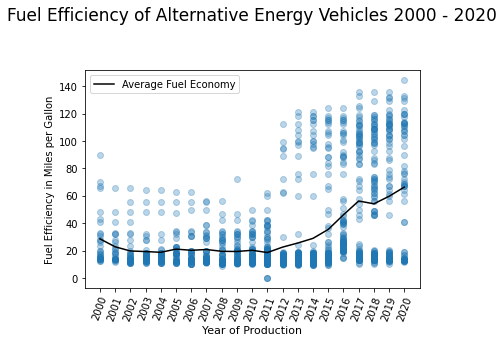

In [20]:
#Alternative Fuel economy for modern cars by year
plt.scatter(x=Econ_cur['Model Year'],y=Econ_cur['Alternative Fuel Economy Combined'], alpha = .3)
plt.plot(yr_grp['Model Year'],yr_grp['Alternative Fuel Economy Combined'],color ='black', label ='Average Fuel Economy')
plt.legend()
plt.title('Fuel Efficiency of Alternative Energy Vehicles 2000 - 2020',fontsize=17,y = 1.2)
plt.xticks(range(2000,2021,1),rotation=70)
plt.xlabel('Year of Production',fontsize = 11)
plt.ylabel('Fuel Efficiency in Miles per Gallon')
plt.show()

##Despite the majority of vehicles still performing at or under 20 miles per gallon the average fuel economy of alternative energy vehicles appears to be increasing taking a visible turn upward around the year 2011. 

### I graphed the data by year on a scatterplot to show the spread of values for efficiency. I then went back and made the average by year and used a line graph to show an average trend.

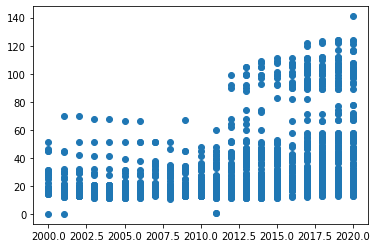

In [21]:
# Conventional Fuel economy for modern cars by year
plt.scatter(Econ_C_cur['Model Year'],Econ_C_cur['Conventional Fuel Economy Combined']);

### This was a test to see what the conventional fuel economy was doing but it seemed to be blurred together with the alternative energy values and I decided not to use it.

In [22]:
df1= Cur_car[Cur_car['Fuel ID']==11]
df2= Cur_car[Cur_car['Fuel ID']==3]
df3=Cur_car[Cur_car['Fuel ID']==35]
df4=Cur_car[Cur_car['Fuel ID']==55]
df5=Cur_car[Cur_car['Fuel ID']==37]
df6=Cur_car[Cur_car['Fuel ID']==39]
df7=Cur_car[Cur_car['Fuel ID']==49]
combust = pd.concat([df1,df2,df3,df4,df5,df6,df7])
combust.head()

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Engine Size,Engine Cylinder Count,Engine Description
34,12301,11,5.0,215,27,2020,14.0,20.0,17.0,18.0,28.0,19.0,3.6L,6.0,3.6L V6
35,12303,11,5.0,215,25,2020,11.0,14.0,12.5,15.0,19.0,14.5,5.3L,8.0,5.3L V8
38,12302,11,5.0,215,25,2020,11.0,13.0,12.0,14.0,18.0,13.5,5.3L,8.0,5.3L V8
39,12269,11,5.0,215,29,2020,11.0,17.0,14.0,15.0,22.0,16.0,5.3L,8.0,5.3L V8
40,12270,11,5.0,215,29,2020,11.0,16.0,13.5,14.0,21.0,15.0,5.3L,8.0,5.3L V8


In [23]:
df8 = Cur_car[Cur_car['Fuel ID']==41]
df9 = Cur_car[Cur_car['Fuel ID']==57]
df10 = Cur_car[Cur_car['Fuel ID']==45]
df11 = Cur_car[Cur_car['Fuel ID']==9]
df12 = Cur_car[Cur_car['Fuel ID']==14]
electric = pd.concat([df8,df9,df10,df11,df12])
electric.head()

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Engine Size,Engine Cylinder Count,Engine Description
10,12431,41,NaN,377,29,2020,78.0,78.0,78.0,NaN,NaN,78.0,141 kW and 172 kW electric motor,NaN,141 kW and 172 kW electric motors;\r\n240 Ah b...
11,12432,41,NaN,377,29,2020,76.0,78.0,77.0,NaN,NaN,78.0,141 kW and 172 kW electric motor,NaN,141 kW and 172 kW electric motors;\r\n240 Ah b...
22,12438,41,1.0,211,27,2020,124.0,102.0,113.0,NaN,NaN,102.0,125 kW electric motor,NaN,125 kW electric motor;\r\n120 Ah battery
23,12439,41,1.0,211,27,2020,124.0,102.0,113.0,NaN,NaN,102.0,135 kW electric motor,NaN,135 kW electric motor;\r\n120 Ah battery
29,12350,41,1.0,410,27,2020,73.0,71.0,72.0,NaN,NaN,71.0,75 kW electric motor,NaN,75 kW electric motor; \r\n270 Ah battery


###Here I did a lot of work because I couldn't find an elegant way to divide the current model dataframe into specific fuel types so I did my best to splice and concatinate two data frame representing electric or partially electric vehicles and combustion type vehicles using alternative fuels.

###I dropped the one example of 'other' as there was no further information and there was only a single value with this fuel catagory.

In [24]:
electric['Alternative Fuel Economy Combined'].sort_values()

1729     0.300
1725     0.345
1651     0.365
2196    13.700
2236    13.700
         ...  
1074       NaN
1103       NaN
1130       NaN
1300       NaN
1595       NaN
Name: Alternative Fuel Economy Combined, Length: 948, dtype: float64

In [25]:
electric[electric['Alternative Fuel Economy Combined']==0.365]

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Engine Size,Engine Cylinder Count,Engine Description
1651,10126,57,NaN,215,27,2011,0.36,0.37,0.365,35.0,40.0,17.685,1.4L,4.0,NaN


In [0]:
cmb_avg = combust.groupby('Model Year', as_index=False)['Alternative Fuel Economy Combined'].mean()
elc_avg = electric.groupby('Model Year', as_index=False)['Alternative Fuel Economy Combined'].mean()

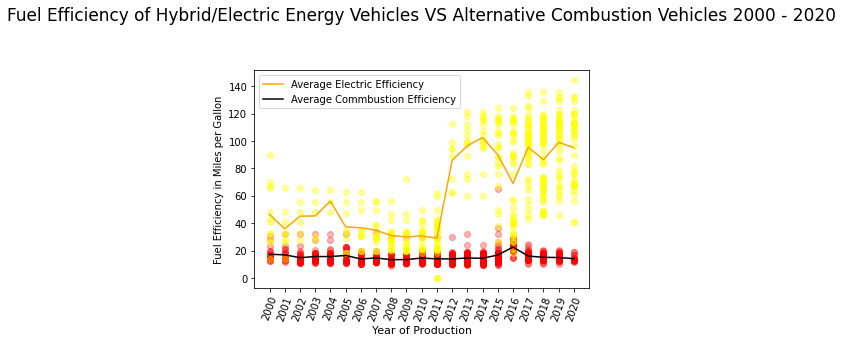

In [27]:
plt.scatter(combust['Model Year'],combust['Alternative Fuel Economy Combined'], color = 'red', alpha =.3)
plt.scatter(electric['Model Year'],electric['Alternative Fuel Economy Combined'], color ='yellow', alpha =.4)
plt.plot(elc_avg['Model Year'],elc_avg['Alternative Fuel Economy Combined'],color ='orange', label ='Average Electric Efficiency')
plt.plot(cmb_avg['Model Year'],cmb_avg['Alternative Fuel Economy Combined'],color ='black', label ='Average Commbustion Efficiency')
plt.legend()
plt.title('Fuel Efficiency of Hybrid/Electric Energy Vehicles VS Alternative Combustion Vehicles 2000 - 2020',fontsize=17,y = 1.2)
plt.xticks(range(2000,2021,1),rotation=70)
plt.xlabel('Year of Production',fontsize = 11)
plt.ylabel('Fuel Efficiency in Miles per Gallon')
plt.show()

## I then repeated my work with finding the average efficiency per year, but this time I have data for the two types of engines plotted together to better illustrate the difference in efficiency between them.

In [28]:
merge_test = combust.merge(fuel_ID,left_on='Fuel ID',right_on='F_ID')
cmb_Wfid = merge_test.drop('F_ID',axis=1)
cmb_ID=cmb_Wfid.merge(brand_ID,left_on='Manufacturer ID',right_on='ID').drop(['ID','Engine Cylinder Count'],axis=1)
cmb_ID=cmb_ID.merge(cat_ID,left_on='Category ID',right_on='C_ID').drop('C_ID',axis=1)
cmb_ID.head()

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Engine Size,Engine Description,fuel,Maker,Category
0,12301,11,5.0,215,27,2020,14.0,20.0,17.0,18.0,28.0,19.0,3.6L,3.6L V6,Ethanol (E85),Chevrolet,Sedan/Wagon
1,12039,11,5.0,215,27,2019,14.0,20.0,17.0,18.0,28.0,19.0,3.6L,3.6L V6,Ethanol (E85),Chevrolet,Sedan/Wagon
2,11856,11,5.0,215,27,2018,14.0,20.0,17.0,18.0,28.0,19.0,3.6L,3.6L V6,Ethanol (E85),Chevrolet,Sedan/Wagon
3,11649,11,5.0,215,27,2017,14.0,20.0,17.0,19.0,28.0,19.5,3.6L,3.6L V6,Ethanol (E85),Chevrolet,Sedan/Wagon
4,11509,11,1.0,215,27,2016,NaN,NaN,NaN,NaN,NaN,NaN,6.0L,6.0L V8,Ethanol (E85),Chevrolet,Sedan/Wagon


In [29]:
elc_Wfid = electric.merge(fuel_ID,left_on='Fuel ID',right_on='F_ID').drop('F_ID',axis=1)
elc_ID = elc_Wfid.merge(brand_ID,left_on='Manufacturer ID',right_on='ID').drop(['ID','Engine Cylinder Count'],axis=1)
elc_ID = elc_ID.merge(cat_ID,left_on='Category ID',right_on='C_ID').drop('C_ID',axis=1)
elc_ID.head()

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Engine Size,Engine Description,fuel,Maker,Category
0,12431,41,NaN,377,29,2020,78.0,78.0,78.0,NaN,NaN,78.0,141 kW and 172 kW electric motor,141 kW and 172 kW electric motors;\r\n240 Ah b...,Electric,Audi,SUV
1,12432,41,NaN,377,29,2020,76.0,78.0,77.0,NaN,NaN,78.0,141 kW and 172 kW electric motor,141 kW and 172 kW electric motors;\r\n240 Ah b...,Electric,Audi,SUV
2,12247,41,NaN,377,29,2019,73.0,74.0,73.5,NaN,NaN,74.0,141 kW and 172 kW electric motor,141 kW and 172 kW electric motors;\r\n240 Ah b...,Electric,Audi,SUV
3,12436,45,9.0,377,29,2020,NaN,NaN,NaN,13.0,19.0,13.0,4.0L,4.0L V8,Hybrid Electric,Audi,SUV
4,11568,45,1.0,377,29,2016,24.0,30.0,27.0,NaN,NaN,30.0,2.0,2.0 I4,Hybrid Electric,Audi,SUV


### Here I rejoined the fuel text description with the two dataframes so I can use the text as hoverover information.

In [30]:
import plotly.express as px
fig = px.scatter(elc_ID,x='Model Year',y='Alternative Fuel Economy Combined',color = 'fuel',hover_data=['Maker'],title='Fuel Efficiency for Electric Vehicles by Alternative Fuel Type Over the Past 20 Years').for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))

fig.show()

In [31]:
fig = px.scatter(cmb_ID,x='Model Year',y='Alternative Fuel Economy Combined',color = 'fuel',hover_data=['Maker'],title='Fuel Efficiency for Combustion Vehicles by Alternative Fuel Type Over the Past 20 Years').for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



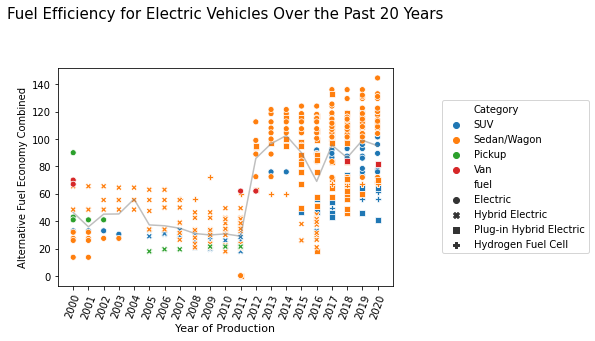

In [32]:
import seaborn as sns
ax = sns.scatterplot(x='Model Year',y='Alternative Fuel Economy Combined',data=elc_ID,style='fuel' ,hue='Category')
ax.legend(loc='right', bbox_to_anchor=(1.6, 0.5), ncol=1)
plt.title('Fuel Efficiency for Electric Vehicles Over the Past 20 Years',fontsize=15,y=1.2)
plt.plot(elc_avg['Model Year'],elc_avg['Alternative Fuel Economy Combined'],color ='grey', label ='Average Electric Efficiency',alpha =.5)
plt.xticks(range(2000,2021,1),rotation=70)
plt.xlabel('Year of Production',fontsize = 11)
plt.show()

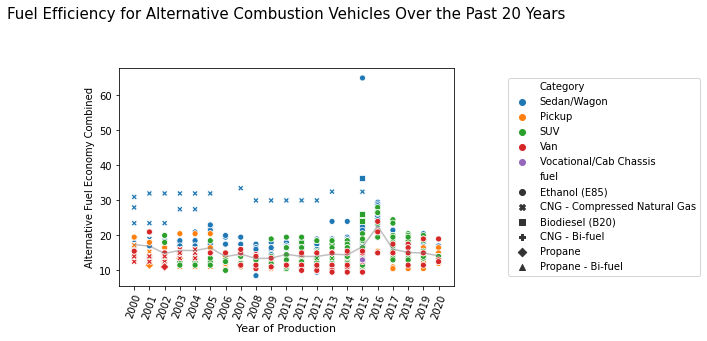

In [33]:
ax = sns.scatterplot(x='Model Year',y='Alternative Fuel Economy Combined',data=cmb_ID,style='fuel' ,hue='Category',ci=.95)
ax.legend(loc='right', bbox_to_anchor=(1.75, 0.5), ncol=1)
plt.title('Fuel Efficiency for Alternative Combustion Vehicles Over the Past 20 Years',fontsize=15,y=1.2)
plt.plot(cmb_avg['Model Year'],cmb_avg['Alternative Fuel Economy Combined'],color ='grey', label ='Average Commbustion Efficiency',alpha=.5)
plt.xticks(range(2000,2021,1),rotation=70)
plt.xlabel('Year of Production',fontsize = 11)
plt.show()

In [34]:
from scipy import stats
stats.ttest_ind(elc_ID['Alternative Fuel Economy Combined'],cmb_ID['Alternative Fuel Economy Combined'],nan_policy='omit')

Ttest_indResult(statistic=45.10355133333579, pvalue=3.593462429497739e-269)